<a href="https://colab.research.google.com/github/venkateshsureshcks/Data_science_projects/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/logistic_regression.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [61]:
df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [62]:
df.shape[0]

396030

In [63]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [64]:
# df[['emp_title', 'emp_length', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line','initial_list_status', 'application_type', 'address']] = df[['emp_title', 'emp_length', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line','initial_list_status', 'application_type', 'address']].fillna('Unknown')
# df[['annual_inc',  'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']] = (df[['annual_inc',  'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']]).fillna(0)

In [65]:
df.isnull().sum() / len(df) * 100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [67]:
df.shape[0], df.shape[1]

(396030, 27)

In [68]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


**Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)**

In [71]:
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
            'verification_status', 'purpose', 'application_type',
            'initial_list_status', 'pub_rec_bankruptcies']

num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

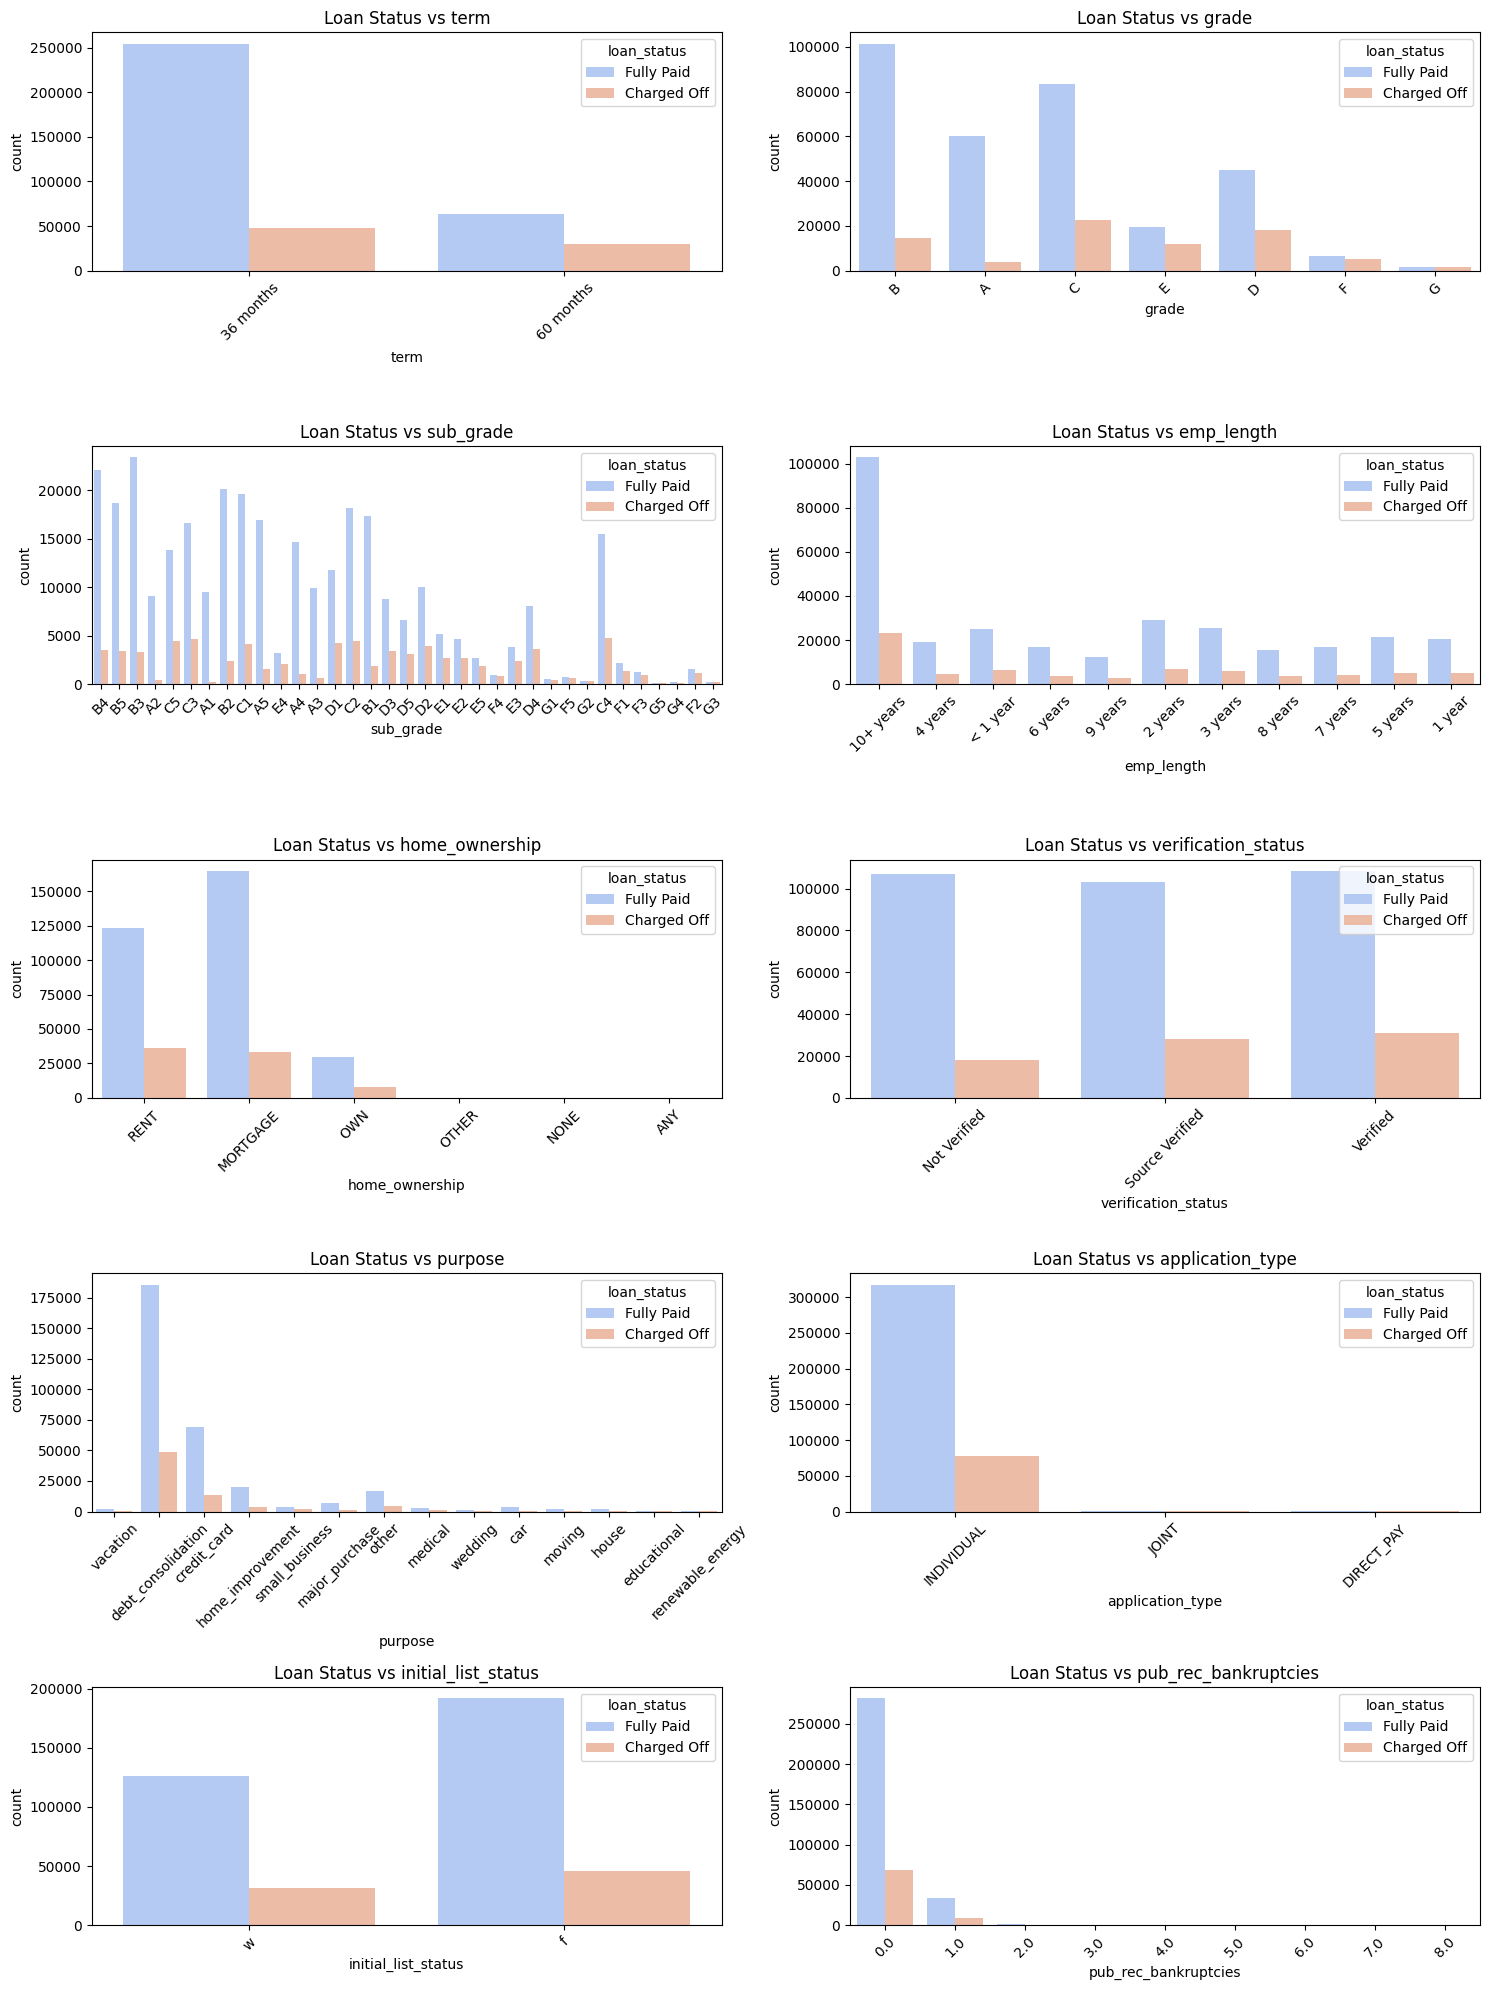

In [72]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='loan_status', palette='coolwarm')
    plt.title(f'Loan Status vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-472690641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=col, palette='Set2')
/tmp/ipython-input-472690641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=col, palette='Set2')
/tmp/ipython-input-472690641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=col, palette='Set2')
/tmp/ipython-input-472690641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

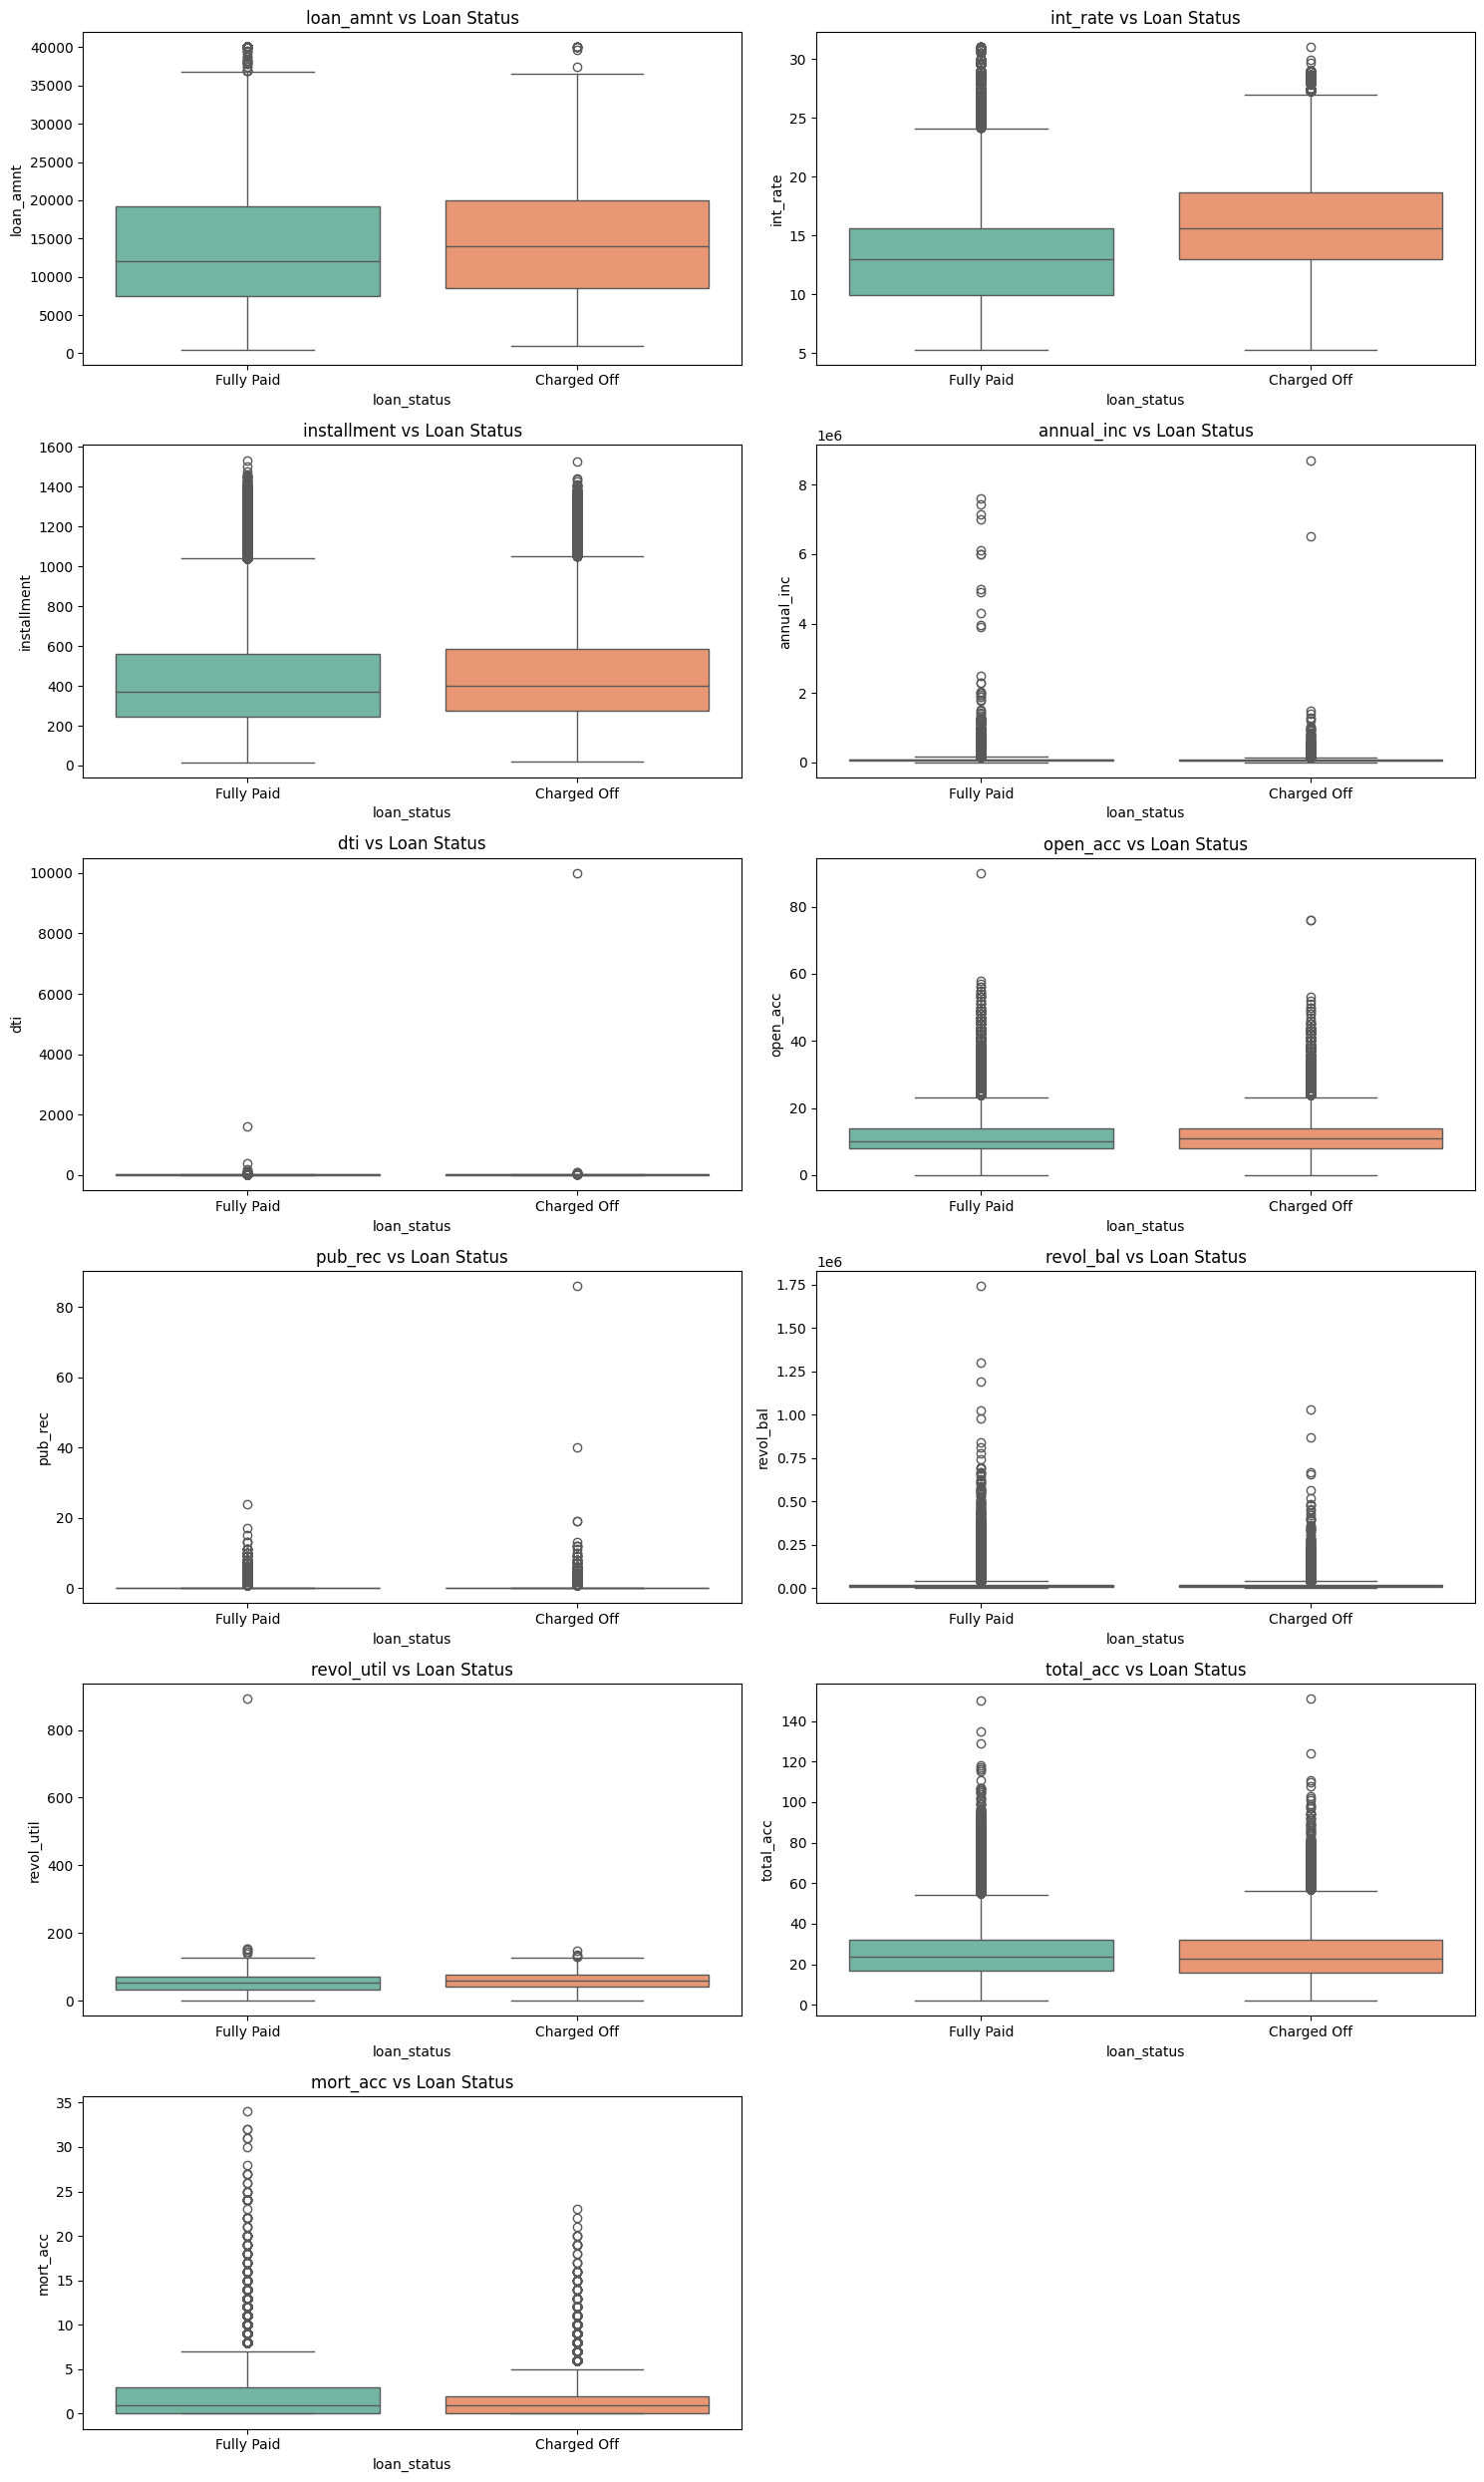

In [73]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(data=df, x='loan_status', y=col, palette='Set2')
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()


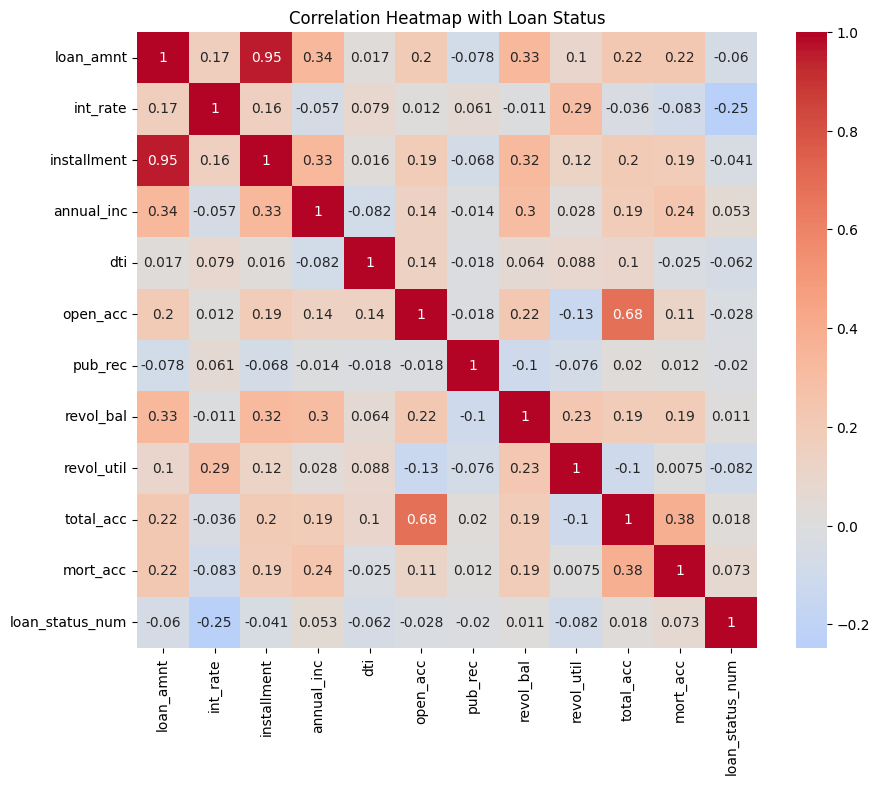

In [74]:
df['loan_status_num'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

corr = df[num_cols + ['loan_status_num']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Loan Status')
plt.show()


**Check correlation among independent variables and how they interact with each other**

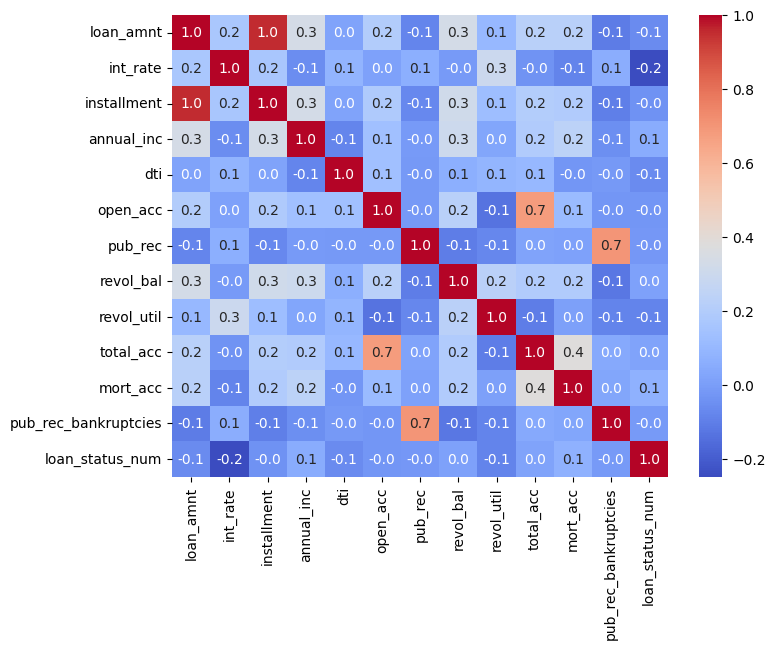

In [75]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

In [76]:
#pub_rec
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
df['pub_rec_flag'].value_counts()

,count
pub_rec_flag,
0,388011
1,8019


In [77]:
#mort_acc
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
df['mort_acc_flag'].value_counts()

,count
mort_acc_flag,
0,237988
1,158042


In [78]:
#pub_rec_bankruptcies
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)
df['pub_rec_bankruptcies_flag'].value_counts()

,count
pub_rec_bankruptcies_flag,
0,393705
1,2325


**Missing values and Outlier Treatment**

In [79]:
cat_cols = ['term', 'grade', 'emp_title','title','sub_grade', 'emp_length', 'home_ownership',
            'verification_status', 'purpose', 'application_type',
            'initial_list_status', 'pub_rec_bankruptcies']

num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df[num_cols] = imputer.fit_transform(df[num_cols])

imputer = SimpleImputer(strategy='most_frequent')

df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [81]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [82]:
df.shape[0]

396030

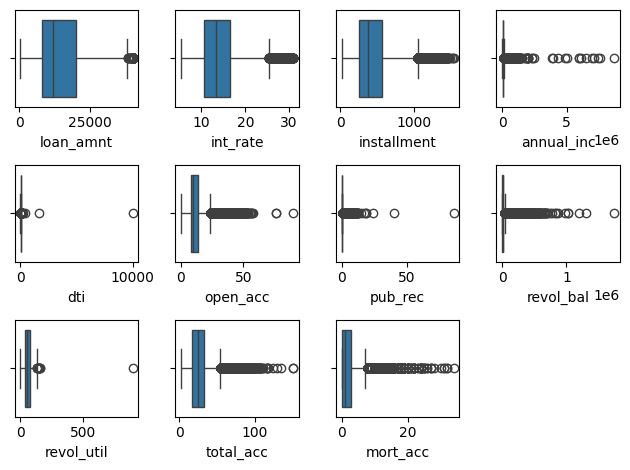

In [83]:
#Outliers

for i,cols in enumerate(num_cols, start = 1):
  plt.subplot(3,4,i)
  sns.boxplot(x = df[cols], orient= "h")
plt.tight_layout()
plt.show()

In [84]:
for i in num_cols:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
  df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])



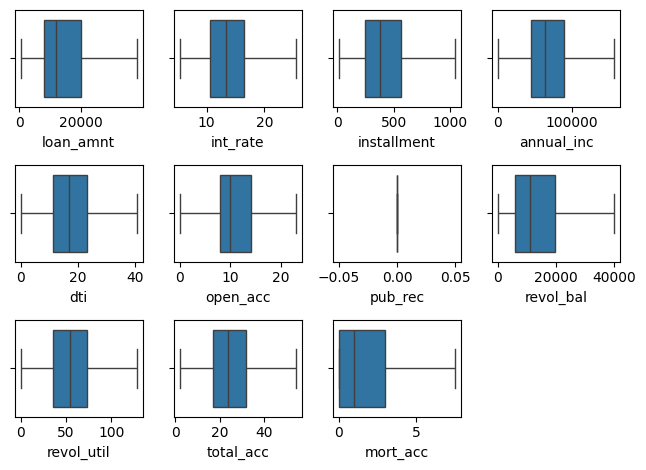

In [85]:
for i,cols in enumerate(num_cols, start = 1):
  plt.subplot(3,4,i)
  sns.boxplot(x = df[cols], orient= "h")
plt.tight_layout()
plt.show()

**Scaling - Using MinMaxScaler or StandardScaler**

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_num,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,0,0,0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,0,1,0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0,0,0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0


In [87]:
date_cols = ['issue_d', 'earliest_cr_line']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month

In [88]:
cat_cols = df.select_dtypes(include = 'object').drop(['emp_title'], axis=1).columns
num_cols = df.select_dtypes(include = ['number', 'float']).drop(['loan_status_num', 'pub_rec_flag','mort_acc_flag', 'pub_rec_bankruptcies_flag'],axis =1).columns

In [89]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [90]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_num,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,0.253333,0,0.303421,0.305257,1,8,Marketing,1,5,0.742857,0,2015-01-01,1,12,36960,0.647422,1990-06-01,0.695652,0.0,0.908941,0.325545,0.438095,1,1,0.000000,0,6206,1,0,0,0,0.888889,0.000000,0.666667,0.454545
1,0.200000,0,0.330689,0.243115,1,9,Credit analyst,4,1,0.412698,0,2015-01-01,1,2,12926,0.544041,2004-07-01,0.739130,0.0,0.503118,0.415109,0.476190,0,1,0.400000,0,38135,1,0,1,0,0.888889,0.000000,0.869565,0.545455
2,0.402667,0,0.256321,0.478136,1,7,Statistician,10,5,0.273378,1,2015-01-01,1,1,10159,0.315569,2007-08-01,0.565217,0.0,0.299581,0.718069,0.457143,0,1,0.000000,0,307942,1,0,0,0,0.888889,0.000000,0.913043,0.636364
3,0.178667,0,0.058007,0.199255,0,1,Client Advocate,6,5,0.342857,0,2014-11-01,1,1,10159,0.064150,2006-09-01,0.260870,0.0,0.136757,0.167445,0.209524,0,1,0.000000,0,291181,1,0,0,0,0.777778,0.909091,0.898551,0.727273
4,0.636667,1,0.592464,0.577836,2,14,Destiny Management Inc.,9,1,0.349206,2,2013-04-01,0,1,9268,0.837651,1999-03-01,0.565217,0.0,0.614408,0.543614,0.780952,0,1,0.133333,0,240127,0,0,0,0,0.666667,0.272727,0.797101,0.181818


In [91]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['emp_title'], df['loan_status'])

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 173676.11875889704
P-value: 0.16542519585876467


In [92]:
df1 = df.copy()
df1.drop(columns = ['emp_title', 'issue_d', 'earliest_cr_line', 'pub_rec','mort_acc','pub_rec_bankruptcies'],inplace = True)
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,address,loan_status_num,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,0.253333,0,0.303421,0.305257,1,8,1,5,0.742857,0,1,12,36960,0.647422,0.695652,0.908941,0.325545,0.438095,1,1,6206,1,0,0,0,0.888889,0.000000,0.666667,0.454545
1,0.200000,0,0.330689,0.243115,1,9,4,1,0.412698,0,1,2,12926,0.544041,0.739130,0.503118,0.415109,0.476190,0,1,38135,1,0,1,0,0.888889,0.000000,0.869565,0.545455
2,0.402667,0,0.256321,0.478136,1,7,10,5,0.273378,1,1,1,10159,0.315569,0.565217,0.299581,0.718069,0.457143,0,1,307942,1,0,0,0,0.888889,0.000000,0.913043,0.636364
3,0.178667,0,0.058007,0.199255,0,1,6,5,0.342857,0,1,1,10159,0.064150,0.260870,0.136757,0.167445,0.209524,0,1,291181,1,0,0,0,0.777778,0.909091,0.898551,0.727273
4,0.636667,1,0.592464,0.577836,2,14,9,1,0.349206,2,0,1,9268,0.837651,0.565217,0.614408,0.543614,0.780952,0,1,240127,0,0,0,0,0.666667,0.272727,0.797101,0.181818


**Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results**

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight= 'balanced')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']}

clf = RandomizedSearchCV(model, param_grid, cv=5, n_iter=100, scoring='accuracy', random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='accuracy')

In [94]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)
accuracy

LogisticRegression(C=1, class_weight='balanced')
{'penalty': 'l2', 'C': 1}
0.9585163765403986


0.951443072494508

Results Evaluation:

1.   Classification Report
1.   ROC AUC curve
2.   Precision recall curve





In [95]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15577
           1       0.98      0.96      0.97     63629

    accuracy                           0.95     79206
   macro avg       0.91      0.94      0.93     79206
weighted avg       0.95      0.95      0.95     79206



ROC AUC: 0.9872121892300922


Text(0, 0.5, 'True Positive Rate')

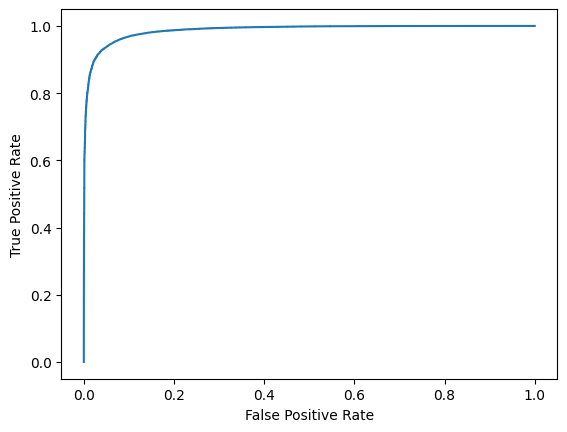

In [96]:
#roc_auv_ curve:
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

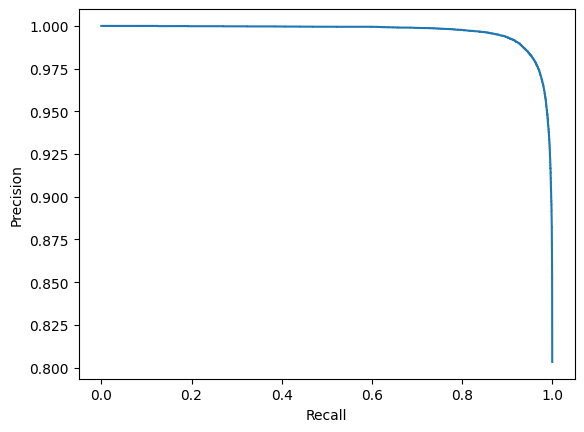

In [97]:
#Precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

<Axes: >

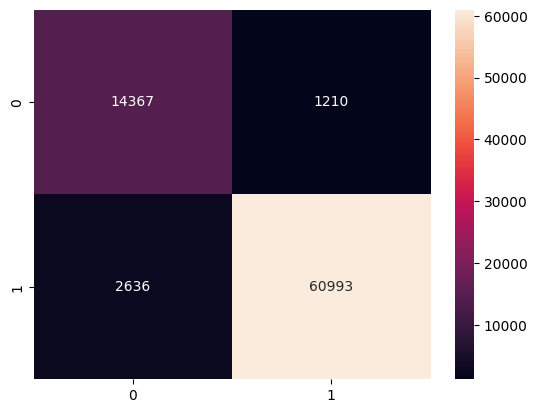

In [98]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf
sns.heatmap(cf, annot = True, fmt = 'd')


In [99]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.0, 1.0, 0.05)

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f} | Precision={precision:.3f} | Recall={recall:.3f}")

Threshold=0.00 | Precision=0.803 | Recall=1.000
Threshold=0.05 | Precision=0.920 | Recall=0.996
Threshold=0.10 | Precision=0.939 | Recall=0.992
Threshold=0.15 | Precision=0.950 | Recall=0.988
Threshold=0.20 | Precision=0.957 | Recall=0.985
Threshold=0.25 | Precision=0.964 | Recall=0.981
Threshold=0.30 | Precision=0.968 | Recall=0.977
Threshold=0.35 | Precision=0.972 | Recall=0.973
Threshold=0.40 | Precision=0.975 | Recall=0.968
Threshold=0.45 | Precision=0.978 | Recall=0.964
Threshold=0.50 | Precision=0.981 | Recall=0.959
Threshold=0.55 | Precision=0.983 | Recall=0.953
Threshold=0.60 | Precision=0.985 | Recall=0.946
Threshold=0.65 | Precision=0.987 | Recall=0.939
Threshold=0.70 | Precision=0.989 | Recall=0.931
Threshold=0.75 | Precision=0.991 | Recall=0.920
Threshold=0.80 | Precision=0.993 | Recall=0.907
Threshold=0.85 | Precision=0.994 | Recall=0.888
Threshold=0.90 | Precision=0.996 | Recall=0.859
Threshold=0.95 | Precision=0.998 | Recall=0.802


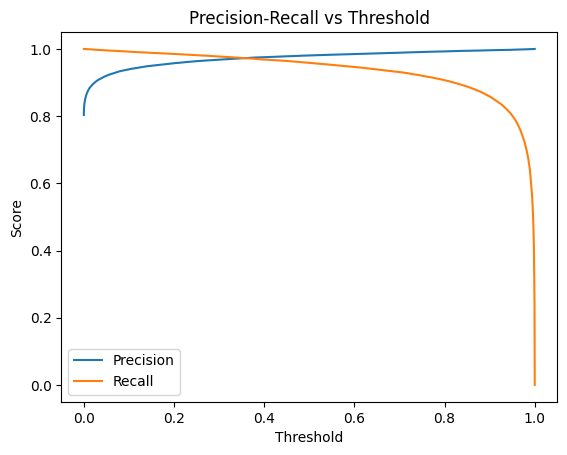

In [100]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()


**Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone**

Threshold = 0.3
Precision (loan rejections accurate) = 0.968
Recall (defaulters detected) = 0.977
Confusion Matrix:
 [[13525  2052]
 [ 1437 62192]]
______________________________
Threshold = 0.5
Precision (loan rejections accurate) = 0.981
Recall (defaulters detected) = 0.959
Confusion Matrix:
 [[14367  1210]
 [ 2636 60993]]
______________________________
Threshold = 0.7
Precision (loan rejections accurate) = 0.989
Recall (defaulters detected) = 0.931
Confusion Matrix:
 [[14899   678]
 [ 4385 59244]]
______________________________


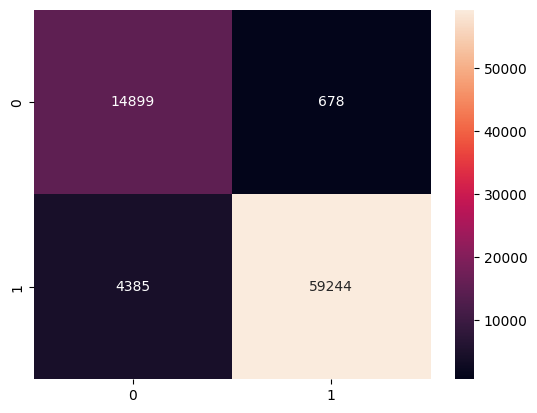

In [101]:
safe_threshold = [0.3,0.5,0.7]

for t in safe_threshold:
  y_pred_safe = (y_prob >= t).astype(int)

  # Evaluate metrics
  precision = precision_score(y_test, y_pred_safe)
  recall = recall_score(y_test, y_pred_safe)
  cm = confusion_matrix(y_test, y_pred_safe)

  print(f"Threshold = {t}")
  print(f"Precision (loan rejections accurate) = {precision:.3f}")
  print(f"Recall (defaulters detected) = {recall:.3f}")
  print("Confusion Matrix:\n", cm)
  print("_"*30)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [102]:
for col in cat_cols:
    df[col] = encoders[col].inverse_transform(df[col])


0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
0    B
1    B
2    B
3    A
4    C
Name: grade, dtype: object
0    B4
1    B5
2    B3
3    A2
4    C5
Name: sub_grade, dtype: object
0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object
0        RENT
1    MORTGAGE
2        RENT
3        RENT
4    MORTGAGE
Name: home_ownership, dtype: object
0       Not Verified
1       Not Verified
2    Source Verified
3       Not Verified
4           Verified
Name: verification_status, dtype: object
0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object
0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object
0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card 

**Questionnaire (Answers should present in the text editor along with insights):**

**What percentage of customers have fully paid their Loan Amount?**

In [103]:
df['loan_status'].value_counts() / len(df) * 100

,count
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


**Comment about the correlation between Loan Amount and Installment features.**

In [104]:
df['installment'].corr(df['loan_amnt'])

np.float64(0.9580653249842619)

**The majority of people have home ownership as _______**

In [105]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


**People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

In [106]:
df.groupby('grade')['loan_status'].value_counts()


grade  loan_status
A      Fully Paid      60151
       Charged Off      4036
B      Fully Paid     101431
       Charged Off     14587
C      Fully Paid      83538
       Charged Off     22449
D      Fully Paid      45186
       Charged Off     18338
E      Fully Paid      19723
       Charged Off     11765
F      Fully Paid       6735
       Charged Off      5037
G      Fully Paid       1593
       Charged Off      1461
Name: count, dtype: int64

In [107]:
grade_all = pd.crosstab(df['grade'], df['loan_status'], margins=True)
grade_all



loan_status,Charged Off,Fully Paid,All
grade,,,
A,4036,60151,64187
B,14587,101431,116018
C,22449,83538,105987
D,18338,45186,63524
E,11765,19723,31488
F,5037,6735,11772
G,1461,1593,3054
All,77673,318357,396030


In [108]:
grade_all['Fully Paid'] / grade_all['All'] * 100

,0
grade,
A,93.712122
B,87.426951
C,78.819100
D,71.132171
E,62.636560
F,57.212029
G,52.161100
All,80.387092


**Name the top 2 afforded job titles.**

In [109]:
df['emp_title'].nunique()

173105

In [110]:
df.groupby('emp_title')['annual_inc'].sum().sort_values(ascending=False).head(2)

,annual_inc
emp_title,
Teacher,9854.778922
Manager,2097.706818


Thinking from a bank's perspective, which metric should our primary focus be on..



1.   ROC AUC
2.   Precision

1.   Recall
2.   F1 Score

In [111]:
recall = recall_score(y_test, y_pred_safe)
print(f"Recall (defaulters detected) = {recall:.3f}")

Recall (defaulters detected) = 0.931


**How does the gap in precision and recall affect the bank?**

In [112]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15577
           1       0.98      0.96      0.97     63629

    accuracy                           0.95     79206
   macro avg       0.91      0.94      0.93     79206
weighted avg       0.95      0.95      0.95     79206



**Which were the features that heavily affected the outcome?**

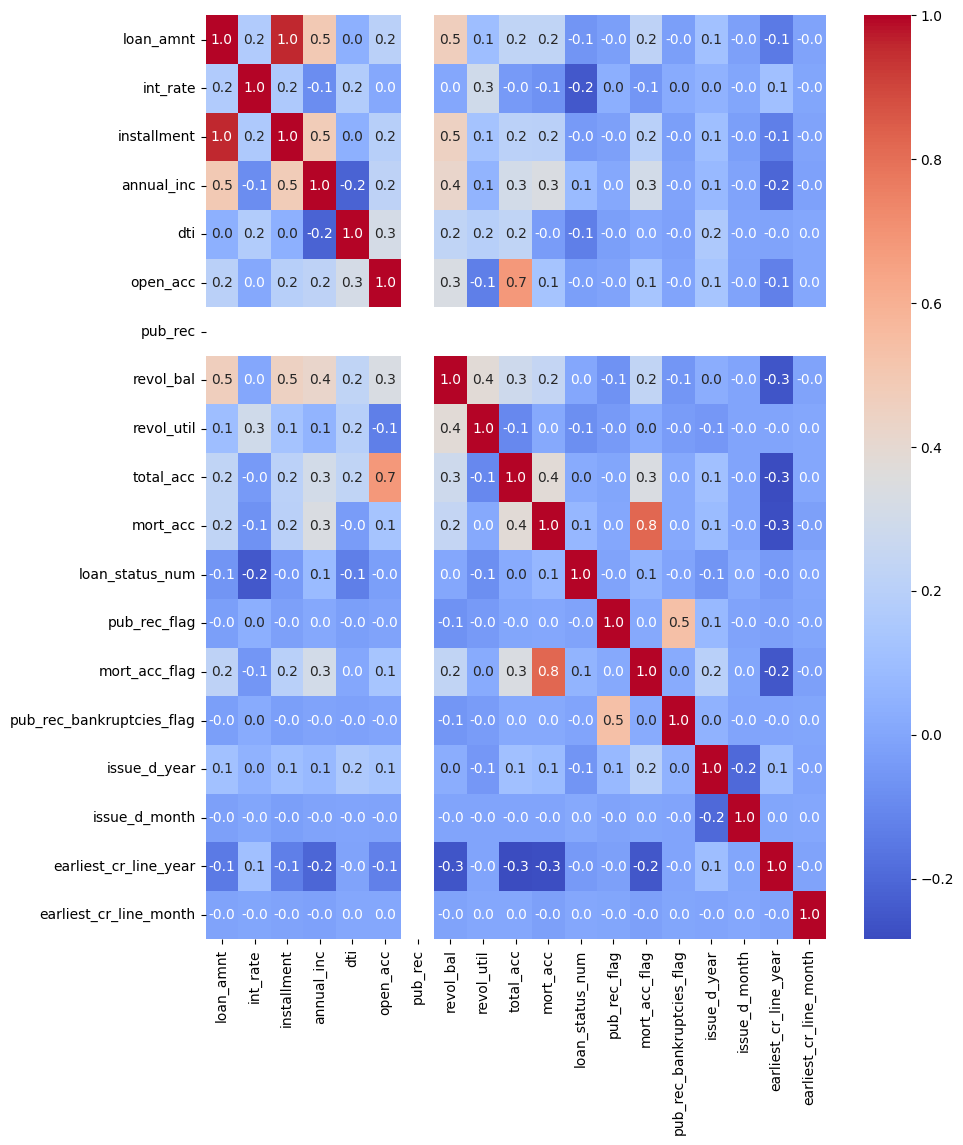

In [116]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 12))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

**Will the results be affected by geographical location? (Yes/No)**

In [119]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_num,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,0.253333,36 months,0.303421,0.305257,B,B4,Marketing,10+ years,RENT,0.742857,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,0.647422,1990-06-01,0.695652,0.0,0.908941,0.325545,0.438095,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,0,0,0,0.888889,0.000000,0.666667,0.454545
1,0.200000,36 months,0.330689,0.243115,B,B5,Credit analyst,4 years,MORTGAGE,0.412698,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,0.544041,2004-07-01,0.739130,0.0,0.503118,0.415109,0.476190,f,INDIVIDUAL,0.400000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,0,1,0,0.888889,0.000000,0.869565,0.545455
2,0.402667,36 months,0.256321,0.478136,B,B3,Statistician,< 1 year,RENT,0.273378,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,0.315569,2007-08-01,0.565217,0.0,0.299581,0.718069,0.457143,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0,0,0,0.888889,0.000000,0.913043,0.636364
3,0.178667,36 months,0.058007,0.199255,A,A2,Client Advocate,6 years,RENT,0.342857,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,0.064150,2006-09-01,0.260870,0.0,0.136757,0.167445,0.209524,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0.777778,0.909091,0.898551,0.727273
4,0.636667,60 months,0.592464,0.577836,C,C5,Destiny Management Inc.,9 years,MORTGAGE,0.349206,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,0.837651,1999-03-01,0.565217,0.0,0.614408,0.543614,0.780952,f,INDIVIDUAL,0.133333,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0.666667,0.272727,0.797101,0.181818


In [124]:
df['loan_status'] = encoders['loan_status'].transform(df['loan_status'])


In [125]:
df.groupby('address')['loan_status'].mean().sort_values(ascending=False)

,loan_status
address,
Unit 9996 Box 9255\r\nDPO AP 05113,1.0
"000 Adam Station Apt. 329\r\nAshleyberg, AZ 22690",1.0
Unit 9982 Box 5716\r\nDPO AP 29597,1.0
Unit 9982 Box 3622\r\nDPO AE 48052,1.0
Unit 9981 Box 2903\r\nDPO AA 30723,1.0
...,...
"5936 Amanda Lock Apt. 745\r\nWoodsshire, NV 11650",0.0
"5936 Christian Meadows Apt. 311\r\nWest Kelliburgh, CT 11650",0.0
"5936 Christopher Orchard\r\nNorth David, NV 22690",0.0
